<a href="https://colab.research.google.com/github/Sumiii15/Dead-Beautiful-My-first-Website/blob/main/Trade_Behaviour_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1: Install and Import Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set seaborn style
sns.set(style='whitegrid')


**2: Load the Datasets**

In [24]:
# Load CSVs into DataFrames
trader_df = pd.read_csv('historical_data.csv')
sentiment_df = pd.read_csv('fear_greed_index.csv')

# Preview columns
print("Trader data columns:\n", trader_df.columns)
print("Sentiment data columns:\n", sentiment_df.columns)

Trader data columns:
 Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')
Sentiment data columns:
 Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [27]:
# Convert both date columns to datetime.date with the correct format
trader_df['date'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M').dt.date
sentiment_df['Date'] = pd.to_datetime(sentiment_df['date']).dt.date  # Ensure the column name matches

# Rename sentiment column for merging
sentiment_df.rename(columns={'Date': 'date', 'classification': 'Sentiment'}, inplace=True)


In [33]:
# Check original 'Sentiment' and 'Closed PnL' columns
print(sentiment_df['classification'].unique())  # For sentiment
print(trader_df['Closed PnL'].head())           # For Closed PnL in the original trader_df

['Fear' 'Extreme Fear' 'Neutral' 'Greed' 'Extreme Greed']
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Closed PnL, dtype: float64


In [34]:
# Remove rows with invalid Sentiment values
valid_sentiments = ['Fear', 'Greed', 'Extreme Fear', 'Neutral', 'Extreme Greed']
merged_df = merged_df[merged_df['Sentiment'].isin(valid_sentiments)]

In [42]:
# Inspect the 'Closed PnL' and 'Sentiment' columns in the original DataFrames
print(trader_df['Closed PnL'].unique())  # Before merge, for trader_df
print(sentiment_df['classification'].unique())  # Before merge, for sentiment_df

[   0.       3008.231185   30.741534 ... -112.5773    -22.4402
  -53.9063  ]
['Fear' 'Extreme Fear' 'Neutral' 'Greed' 'Extreme Greed']


In [55]:
sentiment_df = pd.read_csv("fear_greed_index.csv")  # or .xlsx
print(sentiment_df.shape)
print(sentiment_df.head())

(2644, 4)
    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05


In [58]:
# Step 1: Convert 'date' columns to datetime.date
trader_df['date'] = pd.to_datetime(trader_df['Timestamp IST'], dayfirst=True, errors='coerce').dt.date
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'], errors='coerce').dt.date

# Step 2: Rename 'classification' to 'Sentiment'
sentiment_df = sentiment_df.rename(columns={'classification': 'Sentiment'})

# Step 3: Merge on 'date'
merged_df = pd.merge(trader_df, sentiment_df[['date', 'Sentiment']], on='date', how='left')

# Step 4: Check results
print("Merged shape:", merged_df.shape)
print("Sample with Sentiment:", merged_df[['date', 'Sentiment']].dropna().head())
print("Unique Sentiments:", merged_df['Sentiment'].dropna().unique())

Merged shape: (211224, 18)
Sample with Sentiment:          date      Sentiment
0  2024-12-02  Extreme Greed
1  2024-12-02  Extreme Greed
2  2024-12-02  Extreme Greed
3  2024-12-02  Extreme Greed
4  2024-12-02  Extreme Greed
Unique Sentiments: ['Extreme Greed' 'Extreme Fear' 'Fear' 'Greed' 'Neutral']


In [52]:
print("Sentiment data date range:", sentiment_df['date'].min(), "to", sentiment_df['date'].max())

Sentiment data date range: nan to nan


**3: Preprocess and Merge with Sentiment**

In [57]:
# Load datasets
historical_df = pd.read_csv("historical_data.csv")
sentiment_df = pd.read_csv("fear_greed_index.csv")

# Convert 'Timestamp' column to datetime and extract date
historical_df['Timestamp'] = pd.to_datetime(historical_df['Timestamp'])
historical_df['date'] = historical_df['Timestamp'].dt.date

# Sentiment data already has 'date' and 'classification'
# Merge on date
merged_df = pd.merge(historical_df, sentiment_df[['date', 'classification']], on='date', how='left')

# Optional: Rename for clarity
merged_df.rename(columns={'classification': 'Sentiment'}, inplace=True)

# Preview merged data
merged_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,Sentiment
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1970-01-01 00:28:50,1970-01-01,NaN
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1970-01-01 00:28:50,1970-01-01,NaN
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1970-01-01 00:28:50,1970-01-01,NaN
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1970-01-01 00:28:50,1970-01-01,NaN
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1970-01-01 00:28:50,1970-01-01,NaN


In [49]:
print(trader_df['date'].head())
print(sentiment_df['date'].head())
print(trader_df['date'].dtype)
print(sentiment_df['date'].dtype)

0    2024-12-02
1    2024-12-02
2    2024-12-02
3    2024-12-02
4    2024-12-02
Name: date, dtype: object
0    2018-02-01
1    2018-02-02
2    2018-02-03
3    2018-02-04
4    2018-02-05
Name: date, dtype: object
object
object


Clean the Merged data

In [48]:
# Drop missing PnL values
merged_df = merged_df[merged_df['Closed PnL'].notna()]

# Ensure numeric PnL
merged_df['Closed PnL'] = pd.to_numeric(merged_df['Closed PnL'], errors='coerce')

# Drop rows with NaN in Closed PnL after conversion
merged_df = merged_df.dropna(subset=['Closed PnL'])

# Remove empty or invalid Sentiment values
merged_df = merged_df[merged_df['Sentiment'].astype(str).str.strip().isin(['Fear', 'Greed'])]

print("Cleaned merged_df shape:", merged_df.shape)

Cleaned merged_df shape: (0, 18)


In [37]:
# Check for rows with missing PnL or invalid values
print(merged_df['Closed PnL'].isna().sum())  # Number of missing PnL values
print(merged_df['Sentiment'].isna().sum())   # Number of missing Sentiment values
print(merged_df['Sentiment'].unique())       # Unique values in Sentiment column

# Check the values of 'Closed PnL' before and after conversion to numeric
print(merged_df['Closed PnL'].head())

0
0
[]
Series([], Name: Closed PnL, dtype: float64)


**4: Summary Statistics by Sentiment**

In [59]:
# Summary statistics for PnL under different sentiment
pnl_summary = merged_df.groupby('Sentiment')['Closed PnL'].describe()
print("Closed PnL Summary by Sentiment:")
print(pnl_summary)

Closed PnL Summary by Sentiment:
                 count       mean          std           min  25%  50%  \
Sentiment                                                                
Extreme Fear   21400.0  34.537862  1136.056091  -31036.69194  0.0  0.0   
Extreme Greed  39992.0  67.892861   766.828294  -10259.46800  0.0  0.0   
Fear           61837.0  54.290400   935.355438  -35681.74723  0.0  0.0   
Greed          50303.0  42.743559  1116.028390 -117990.10410  0.0  0.0   
Neutral        37686.0  34.307718   517.122220  -24500.00000  0.0  0.0   

                     75%           max  
Sentiment                               
Extreme Fear    5.635032  115287.00000  
Extreme Greed  10.028709   44223.45187  
Fear            5.590856  135329.09010  
Greed           4.944105   74530.52371  
Neutral         3.995795   48504.09555  


In [41]:
print(merged_df['Closed PnL'].unique())  # Check if there is variation in PnL
print(merged_df['Sentiment'].unique())   # Check unique values in Sentiment

[]
[]


**5: Visualizing PnL Distribution by Sentiment**

<ipython-input-60-833315fff803>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='Sentiment', y='Closed PnL', palette='coolwarm')


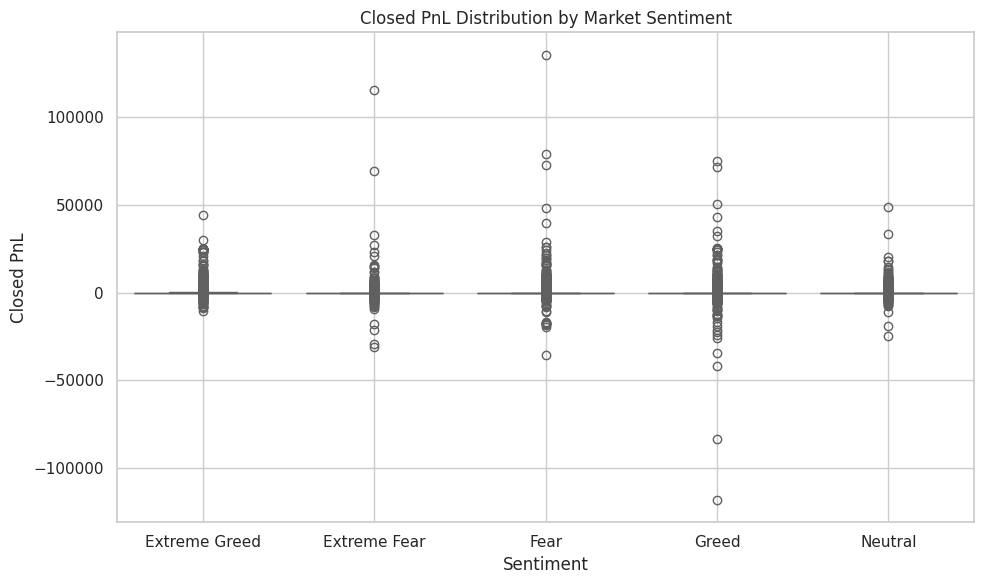

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(data=merged_df, x='Sentiment', y='Closed PnL', palette='coolwarm')
plt.title('Closed PnL Distribution by Market Sentiment')
plt.grid(True)
plt.tight_layout()
plt.savefig("pnl_by_sentiment.png")
plt.show()

**6: Top Trader Behavior Under Different Sentiments**

In [61]:
# Identify top 5 accounts by total PnL
top_accounts = merged_df.groupby('Account')['Closed PnL'].sum().nlargest(5).index

# Filter for these accounts
top_df = merged_df[merged_df['Account'].isin(top_accounts)]

# Compare average size and PnL under different sentiments
top_behavior = top_df.groupby(['Account', 'Sentiment'])[['Size USD', 'Closed PnL']].mean().round(2)
print("Top Trader Behavior (Avg Size & PnL) by Sentiment:")
print(top_behavior)

Top Trader Behavior (Avg Size & PnL) by Sentiment:
                                                          Size USD  Closed PnL
Account                                    Sentiment                          
0x083384f897ee0f19899168e3b1bec365f52a9012 Extreme Fear   15071.01     1247.69
                                           Extreme Greed  12080.27      -42.63
                                           Fear           17020.49      626.19
                                           Greed          15134.13      482.09
                                           Neutral        23337.00      298.46
0x513b8629fe877bb581bf244e326a047b249c4ff1 Extreme Fear    9644.02     -205.55
                                           Extreme Greed   3261.58        0.00
                                           Fear           37633.68       61.39
                                           Greed          38497.73       51.45
                                           Neutral        27702.05      151.50
0

In [67]:
# Convert PnL to numeric, remove invalids
merged_df['Closed PnL'] = pd.to_numeric(merged_df['Closed PnL'], errors='coerce')
filtered_df = merged_df.dropna(subset=['Closed PnL', 'Sentiment'])

# Optional: Simplify sentiment
sentiment_map = {
    'Extreme Fear': 'Fear',
    'Fear': 'Fear',
    'Neutral': 'Neutral',
    'Greed': 'Greed',
    'Extreme Greed': 'Greed'
}
filtered_df['Sentiment'] = filtered_df['Sentiment'].map(sentiment_map)

<ipython-input-67-3f55f69c1e2f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Sentiment'] = filtered_df['Sentiment'].map(sentiment_map)


**7: PnL Volatility Comparison**

In [68]:
# Calculate standard deviation of PnL per sentiment
pnl_volatility = merged_df.groupby('Sentiment')['Closed PnL'].std()
print("PnL Volatility by Sentiment:")
print(pnl_volatility)

PnL Volatility by Sentiment:
Sentiment
Extreme Fear     1136.056091
Extreme Greed     766.828294
Fear              935.355438
Greed            1116.028390
Neutral           517.122220
Name: Closed PnL, dtype: float64


<ipython-input-69-b5b9f91396f4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df, x='Sentiment', y='Closed PnL', palette='coolwarm')


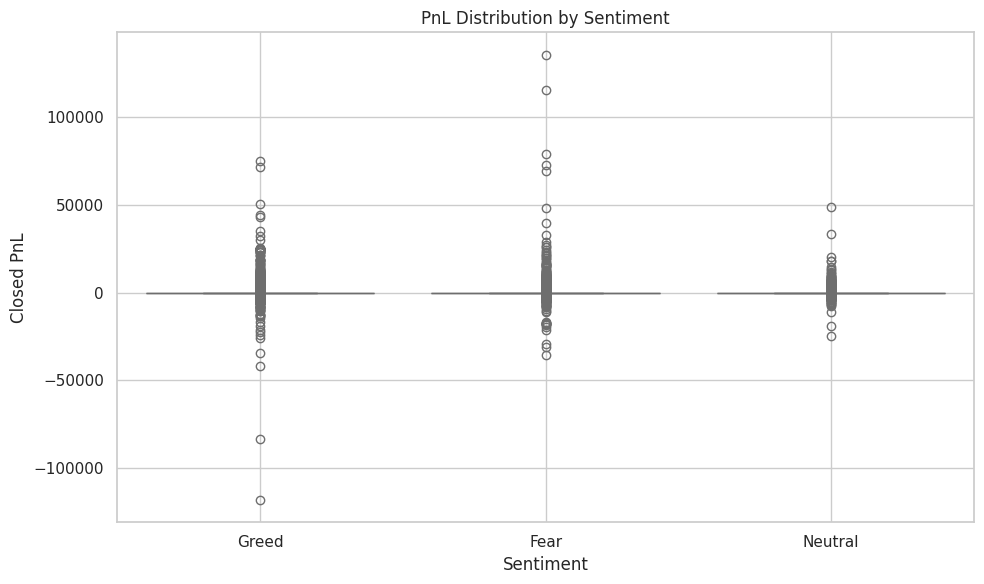

In [69]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df, x='Sentiment', y='Closed PnL', palette='coolwarm')
plt.title('PnL Distribution by Sentiment')
plt.grid(True)
plt.tight_layout()
plt.savefig("pnl_by_sentiment.png")
plt.show()

**8: Leverage Distribution Visualization**

<ipython-input-70-3fe369af95cb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Leverage'] = filtered_df['Size USD'] / filtered_df['Size Tokens']


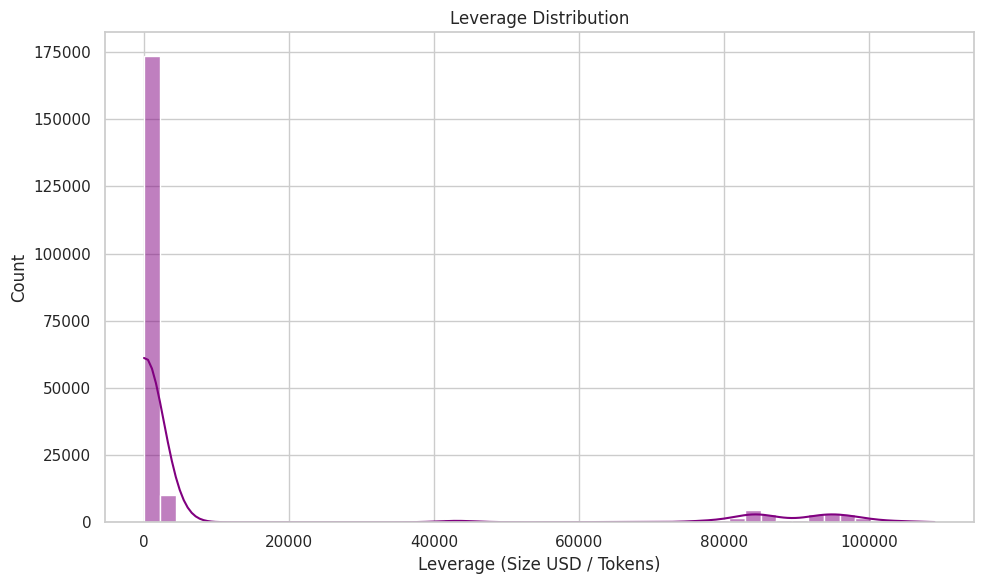

In [70]:
# Compute leverage (approximate)
filtered_df['Leverage'] = filtered_df['Size USD'] / filtered_df['Size Tokens']
filtered_df = filtered_df.replace([np.inf, -np.inf], np.nan).dropna(subset=['Leverage'])

plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['Leverage'], bins=50, kde=True, color='purple')
plt.title('Leverage Distribution')
plt.xlabel('Leverage (Size USD / Tokens)')
plt.grid(True)
plt.tight_layout()
plt.savefig("leverage_distribution.png")
plt.show()

**9: Trader-Level Behavior Analysi**s

In [71]:
# Group by trader
trader_stats = filtered_df.groupby('Account').agg({
    'Closed PnL': ['mean', 'sum'],
    'Sentiment': lambda x: x.mode()[0] if not x.mode().empty else None,
    'Side': lambda x: x.mode()[0] if not x.mode().empty else None
}).reset_index()

trader_stats.columns = ['Account', 'Avg_PnL', 'Total_PnL', 'Most_Common_Sentiment', 'Preferred_Side']
print(trader_stats.head())

                                      Account     Avg_PnL     Total_PnL  \
0  0x083384f897ee0f19899168e3b1bec365f52a9012  419.127768  1.600230e+06   
1  0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd    6.577654  4.788532e+04   
2  0x271b280974205ca63b716753467d5a371de622ab  -18.492043 -7.043619e+04   
3  0x28736f43f1e871e6aa8b1148d38d4994275d72c4    9.951530  1.324648e+05   
4  0x2c229d22b100a7beb69122eed721cee9b24011dd   52.071011  1.686580e+05   

  Most_Common_Sentiment Preferred_Side  
0                  Fear           SELL  
1                 Greed           SELL  
2                  Fear           SELL  
3                 Greed            BUY  
4                 Greed           SELL  


 **10: Save Trader Summary to CSV**

In [72]:
trader_stats.to_csv("trader_behavior_summary.csv", index=False)